<a href="https://colab.research.google.com/github/locphan9/MAX7219-Ticker-DIsplay/blob/main/Phys444.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [7]:
f = pd.read_csv("/dzp5542_data.csv")

In [9]:
f["ln(v)"] = np.log(f['Velocity ±0.5 (m/s)'])
f["1/v"] = 1/f['Velocity ±0.5 (m/s)']

In [10]:
f

,Time ±0.001 (s),Velocity ±0.5 (m/s),ln(v),1/v
0,0.00,43.3,3.768153,0.023095
1,0.01,42.5,3.749504,0.023529
2,0.02,41.6,3.728100,0.024038
3,0.03,40.6,3.703768,0.024631
4,0.04,40.1,3.691376,0.024938
...,...,...,...,...
196,1.96,7.5,2.014903,0.133333
197,1.97,8.3,2.116256,0.120482
198,1.98,7.4,2.001480,0.135135
199,1.99,7.2,1.974081,0.138889


In [11]:
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

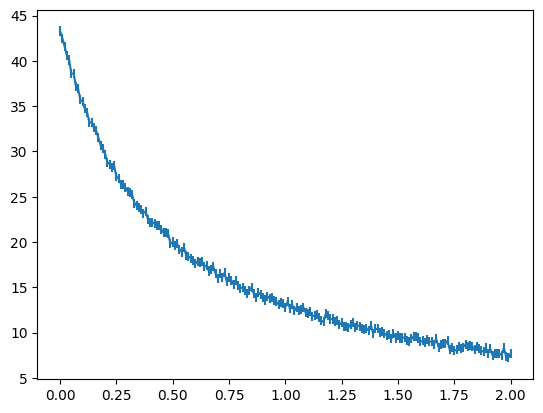

In [12]:
plt.errorbar(f['Time ±0.001 (s)'],f['Velocity ±0.5 (m/s)'],xerr=0.001,yerr=0.5)

Text(0, 0.5, 'Velovity')

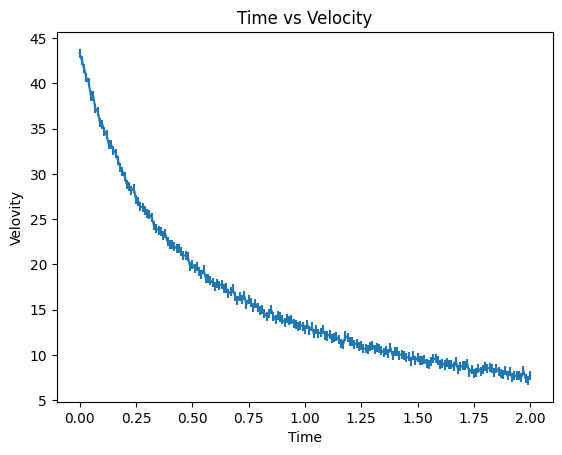

In [36]:
plt.title("Time vs Velocity")
plt.errorbar(f['Time ±0.001 (s)'],f['Velocity ±0.5 (m/s)'],xerr=0.001,yerr=0.5)
plt.xlabel('Time')
plt.ylabel('Velovity')

Text(0, 0.5, 'ln(V)')

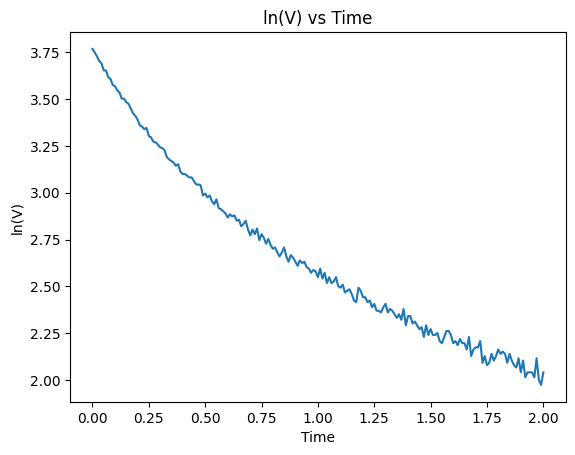

In [37]:
plt.title("ln(V) vs Time")
plt.errorbar(f['Time ±0.001 (s)'],f['ln(v)'])
plt.xlabel('Time')
plt.ylabel('ln(V)')

Text(0, 0.5, '-1/V')

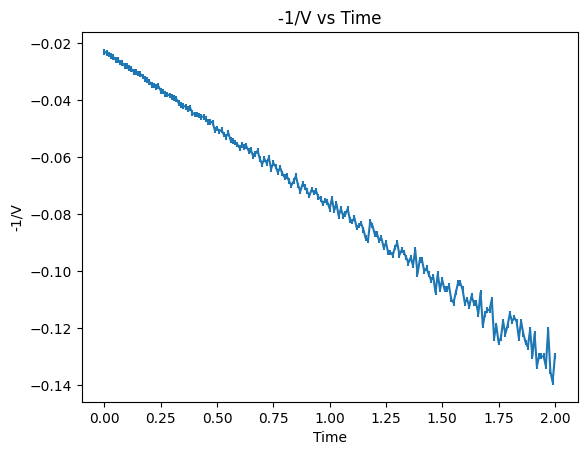

In [41]:
plt.title("-1/V vs Time")
plt.errorbar(f['Time ±0.001 (s)'],-f['1/v'],xerr=0.001,yerr=0.001)
plt.xlabel('Time')
plt.ylabel('-1/V')

In [42]:
inverse = np.polyfit(f['Time ±0.001 (s)'],f['1/v'],1,True)
log = np.polyfit(f['Time ±0.001 (s)'],f['ln(v)'],1,True)

In [43]:
# calculate chi squared

inv_chi = np.sum((np.polyval(inverse, f['Time ±0.001 (s)']) - f['1/v']) ** 2)
log_chi = np.sum((np.polyval(log, f['Time ±0.001 (s)']) - f['ln(v)']) ** 2)

print(inv_chi,log_chi)

0.0010468266977905756 2.09423727901111


In [44]:
from sklearn.metrics import r2_score

inv_r2 = r2_score(f['1/v'], np.polyval(inverse, f['Time ±0.001 (s)']))
log_r2 = r2_score(f['ln(v)'],np.polyval(log, f['Time ±0.001 (s)']))
print(inv_r2,log_r2)

0.994767582772536 0.9532821012372341


### Chi Squared Test is a better fit parameter.

In [29]:
import scipy

In [45]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(f['Time ±0.001 (s)'], f['1/v'],)
print(slope,intercept)

0.05423116517143308 0.022749389976342467
